length of all data:  1
length of all data:  2
length of all data:  3
length of all data:  4
length of all data:  5
length of all data:  6
key:  FL0_fullModel-1_K_models_MLE.tsv


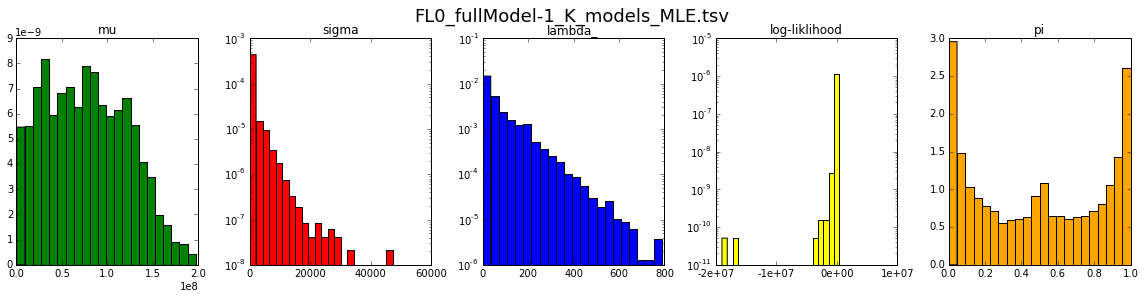

key:  FL1_fullModel-1_K_models_MLE.tsv


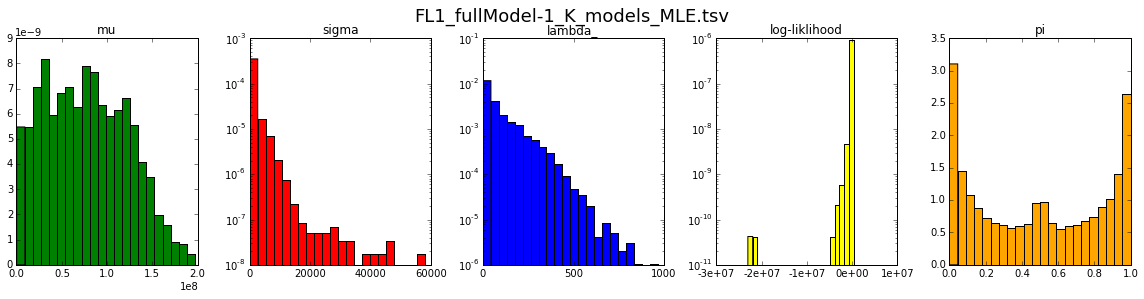

key:  FL6_fullModel-1_K_models_MLE.tsv


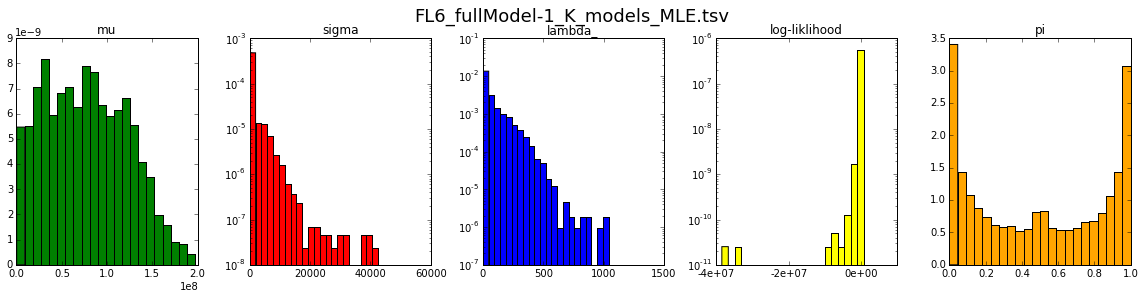

key:  WT0_fullModel-1_K_models_MLE.tsv


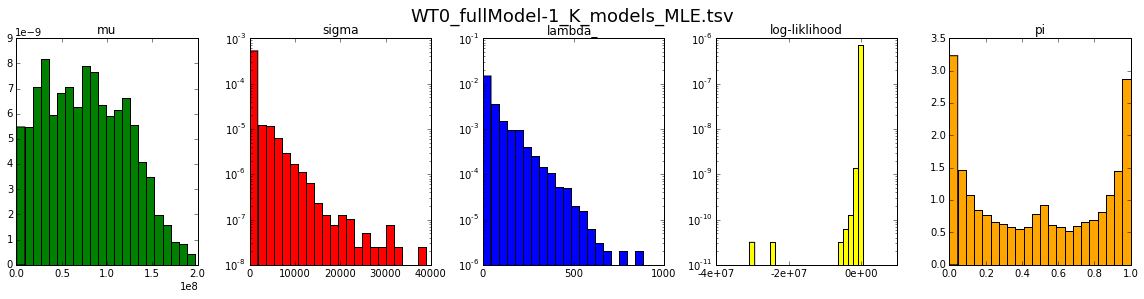

key:  WT1_fullModel-1_K_models_MLE.tsv


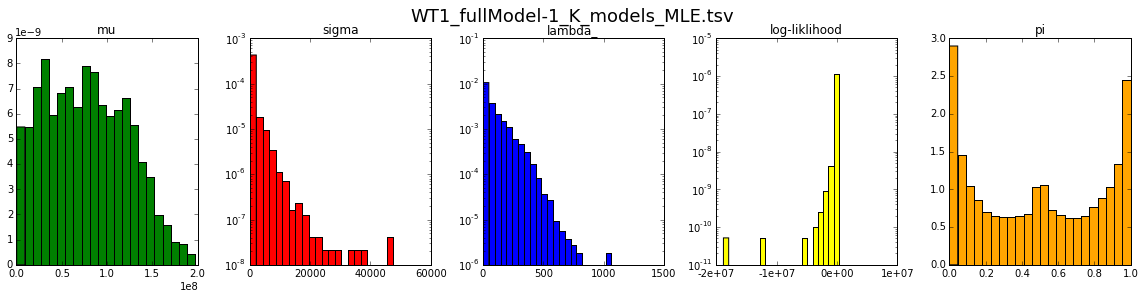

key:  WT6_fullModel-1_K_models_MLE.tsv


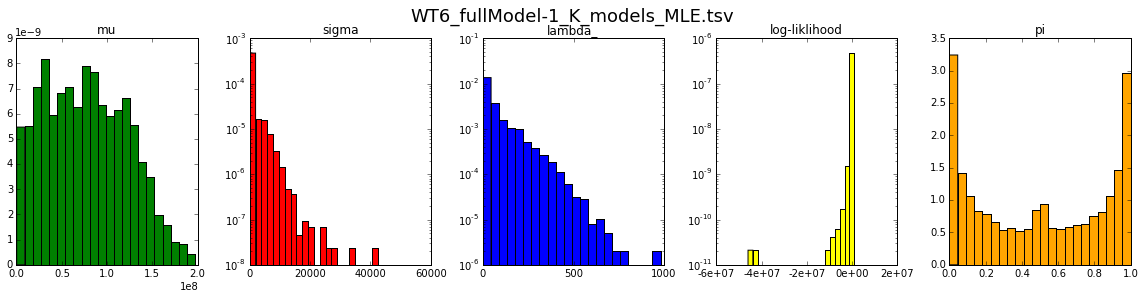

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [2]:
### This cell imports the data from the text files and creates the graphs for each file
### The main output is the all_data dict, which uses the filename as the key, and then contains an array of arrays
### with the stats for each position

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import sys
from scipy import stats
import matplotlib.ticker as mtick


### Initiate lists of variables for later use
all_mu = []
all_sigma = []
all_pi = []
all_lambda_= []
all_data = dict()
def main():  
    ### Pick the file directory
    #directory = '/media/ab/data/Research_Data/MM9_FullModel_Files/TEST2/'
    #directory = '/media/ab/data/Research_Data/MM9_FullModel_Files/'
    directory = '/media/ab/data/Research_Data/Matthias/'
    dir_list = sorted(os.listdir(directory))
    for filename in dir_list:
        if filename[-4:] == '.tsv':      ### Load only the TSV files
            all_data[filename] = load_from_file(directory+filename)
            print "length of all data: ", len(all_data)

    for key  in sorted(all_data.keys()):      
        print "key: ", key
        mu, sigma, lambda_, log_likelihood, pi = get_data_for_graphs(all_data[key])
        make_graphs(key, mu, sigma, lambda_, log_likelihood, pi)
    
def load_from_file(file_to_open):    

    x=open(file_to_open)   ### Open the file
    data = []                    ### Initiate the data list
    position = ['', '', 0, 0, 0, 0, 0, 0, 0, ]               ### Initate the dict for each genomic interval
    for line in x:               ### For each line in the file x
        if line[0] is '>':       ### Look for indicator of new interval
            position[0] = line.split('|')[0][1:].strip('\n')
            position[1] = (line.split('|')[1]).split(':')[0].strip('\n')
            position[2] = ((line.split('|')[1]).split(':')[1]).split('-')[0].strip('\n')
            position[3] = ((line.split('|')[1]).split(':')[1]).split('-')[1].strip('\n')
            #position['for_cov'] = (line.split('|')[2]).split(',')[0].strip('\n')
            #position['rev_cov'] = (line.split('|')[2]).split(',')[1].strip('\n')
        if line[0] is '~' and line[1] is '1':   ### Look for indicator of model 1
            position[4] = inf_to_zero((line.split('\t')[0]).split(',')[1].strip('\n'))  # log-likelihood
            position[5] = inf_to_zero(line.split('\t')[1].strip('\n'))			# mu
            position[6] = inf_to_zero(line.split('\t')[2].strip('\n'))			# sigma
            position[7] = inf_to_zero(line.split('\t')[3].strip('\n'))			# lambda
            position[8] = inf_to_zero(line.split('\t')[4].strip('\n'))			# pi
            #model_1['fp_k'] = inf_to_zero(line.split('\t')[5].strip('\n'))
            #model_1['w_[p,k]'] = inf_to_zero((line.split('\t')[6]).split(',')[0].strip('\n'))
            #model_1['w_[f,k]'] = inf_to_zero((line.split('\t')[6]).split(',')[1].strip('\n'))
            #model_1['w_[r,k]'] = inf_to_zero((line.split('\t')[6]).split(',')[2].strip('\n'))
            #model_1['b_[f,k]'] = inf_to_zero(line.split('\t')[7].strip('\n'))
            #model_1['a_[r,k]'] = inf_to_zero(line.split('\t')[8].strip('\n'))       
            #position['model_1'] = model_1       ### Add the model1 dict to the interval dict
            data.append(position)               ### Append the interval dict to the data list                
            position = ['', '', 0, 0, 0, 0, 0, 0, 0, ]                   ### Reset the position
    x.close()
    return data            
        
def get_data_for_graphs(data):              
    lambda_ = []                 ### Init the list of all lambda values
    sigma = []                   ### Init the list of all sigma values
    mu = []                      ### Init the list of all mu values
    log_likelihood = []          ### Init the list of all log_likelihood values
    pi = []                      ### Init the list of all pi values

    for position in data:               ### For each interval, copy the statistics to a separate list
        lambda_.append(float(position[7]))
        sigma.append(float(position[6]))
        mu.append(float(position[5]))
        log_likelihood.append(float(position[4]))
        pi.append(float(position[8]))
        #mu_pi.append((float(position['model_1']['mu_k']), float(position['model_1']['pi_k'])))
    
    return (mu, sigma, lambda_, log_likelihood, pi)
        
        
def make_graphs(filename, x1, x2, x3, x4, x5):
    ### Calculate the number of bins for the histogram
    x1_bins = len(x1) / 1000
    x2_bins = len(x2) / 1000
    x3_bins = len(x3) / 1000
    x4_bins = len(x4) / 1000
    x5_bins = len(x5) / 1000
    #print x1_bins, x2_bins, x3_bins, x4_bins, x5_bins

    ### Make the five histogram axes for the plot
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

    ### Add the data to the histograms
    ax1.hist(x1, x1_bins, normed=1, histtype='bar', color='green')
    ax1.set_title('mu')
    ax2.hist(x2, x2_bins, normed=1, histtype='bar', color='red', log=True)
    ax2.set_title('sigma')
    ax2.locator_params(axis='x',nbins=4)            
    ax3.hist(x3, x3_bins, normed=1, histtype='bar', facecolor='blue', log=True)
    ax3.set_title('lambda_')
    ax3.locator_params(axis='x',nbins=4)
    ax4.hist(x4, x4_bins, normed=1, histtype='bar', facecolor='yellow', log=True)
    ax4.set_title('log-liklihood')
    ax4.locator_params(axis='x',nbins=4)
    #ax4.set_xscale("log")
    ax4.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
    ax5.hist(x5, x5_bins, normed=1, histtype='bar', facecolor='orange')
    ax5.set_title('pi')

    ### Add a title to the plot
    fig.suptitle(filename, y=1.02, fontsize=18)

    ### Set the layout and show the plot
    plt.tight_layout()
    plt.show()
    

def inf_to_zero(value):
    if (float(value) == float('inf')) or (-float(value) == float('inf')):
        #print "inf removed", value
        return 0
    else:
        return value

if __name__ == "__main__":
    sys.exit(main())




Euclidian distance didn't work
False
operands could not be broadcast together with shapes (2585,) (270,) 
Euclidian distance didn't work
False
operands could not be broadcast together with shapes (218,) (270,) 
Euclidian distance didn't work
False
operands could not be broadcast together with shapes (218,) (2585,) 
Euclidian distance didn't work
False
operands could not be broadcast together with shapes (1553,) (270,) 
Euclidian distance didn't work
False
operands could not be broadcast together with shapes (1553,) (2585,) 
Euclidian distance didn't work
False
operands could not be broadcast together with shapes (1553,) (218,) 
Euclidian distance didn't work
False
operands could not be broadcast together with shapes (1776,) (270,) 
Euclidian distance didn't work
False
operands could not be broadcast together with shapes (1776,) (2585,) 
Euclidian distance didn't work
False
operands could not be broadcast together with shapes (1776,) (218,) 
Euclidian distance didn't work
False
operands

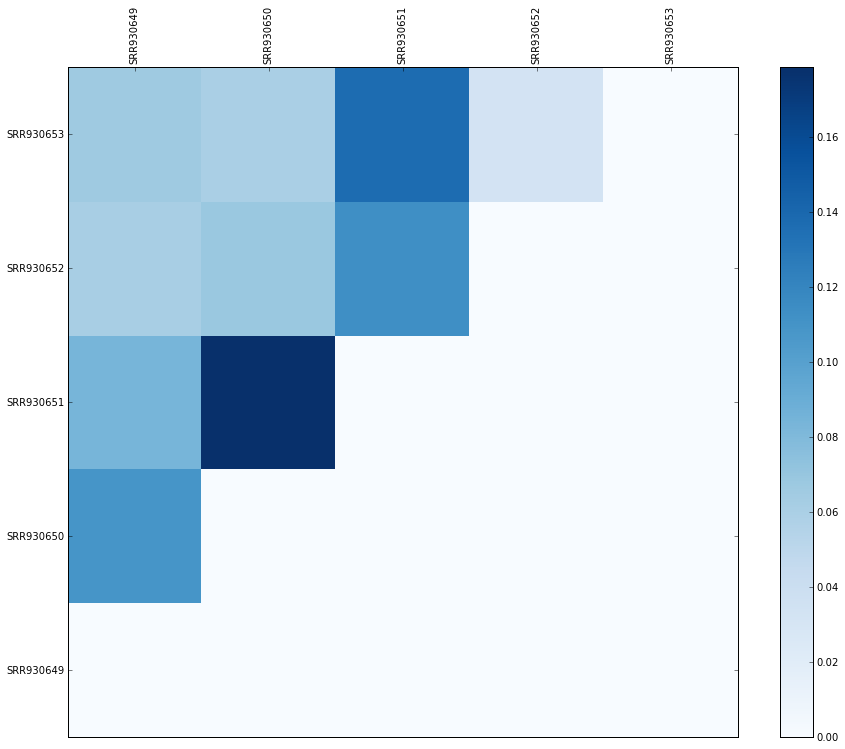

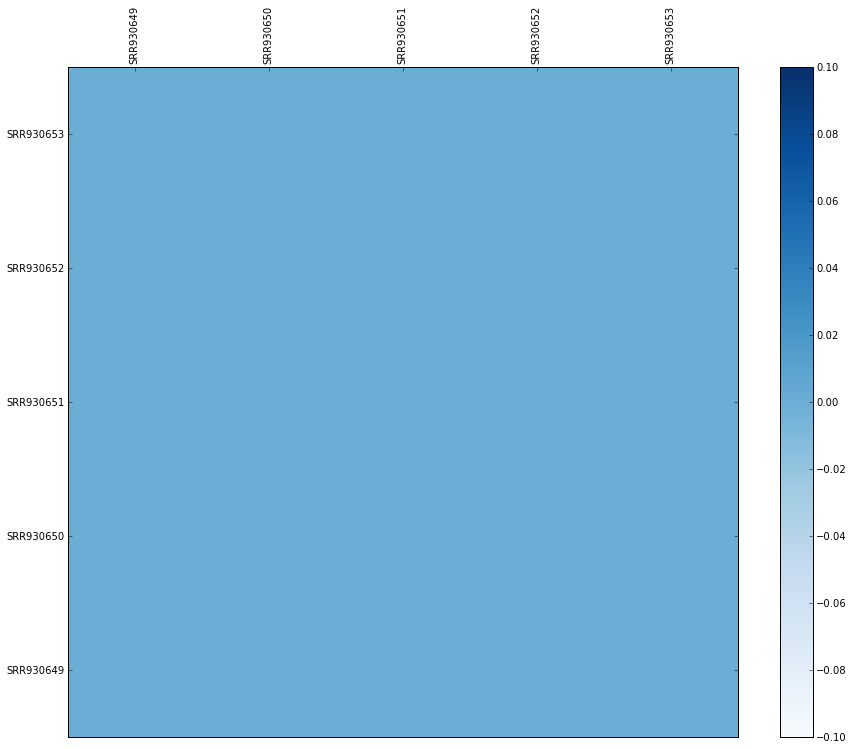

In [19]:
### This calculates the euclidian distance and the 2sample ks between each pair of files in the dataset

%matplotlib inline
from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy as np
import math

file_list = []
all_pi = []


#print len(all_data)
for key in sorted(all_data.keys()):      
    file_list.append(key)
    pi = []
    for i in range(len(all_data[key])):
        pi.append(float(all_data[key][i][8]))
    all_pi.append(pi)

#print all_pi
pi_length = len(all_pi)

#ks_results_p = np.zeros((pi_length, pi_length))
ks_results_stat = np.zeros((pi_length, pi_length))
#ks_results_p_log= np.zeros((pi_length, pi_length))
#ks_results_stat_log = np.zeros((pi_length, pi_length))
euclidean_distance = np.zeros((pi_length, pi_length))

k = 0
for i in range(pi_length):
    for j in range(k):
        #ks_results[i][j] = scipy.stats.ks_2samp(all_sigma[i][1],all_sigma[j][1])
        ks_results_stat[i][j] = scipy.stats.ks_2samp(all_pi[i],all_pi[j])[0]
        #ks_results_p[i][j] = scipy.stats.ks_2samp(all_pi[i][1],all_pi[j][1])[1]
        #ks_results_stat_log[i][j] = np.log10([scipy.stats.ks_2samp(all_pi[i][1],all_pi[j][1])[0] ])
        #ks_results_p_log[i][j] = np.log10([scipy.stats.ks_2samp(all_pi[i][1],all_pi[j][1])[1] ])
        try:
            euclidean_distance[i][j]  = distance.euclidean(np.array(all_pi[i]),np.array(all_pi[j]))
        except Exception, e:
            print "Euclidian distance didn't work"
            print len(np.array(all_pi[i])) == len(np.array(all_pi[j]))
            print e
        #print i, " ", j
    #ks_labels.append(all_pi[i][0])
    k += 1
    #print k

row_labels = file_list

#for dataset in [ks_results_stat, ks_results_p, ks_results_stat_log, ks_results_p_log, euclidean_distance]:    
for dataset in [ks_results_stat, euclidean_distance]: 
    fig, ax = plt.subplots(figsize=(15, 12))
    heatmap = ax.pcolormesh(dataset, cmap=plt.cm.Blues)
    #print row_labels
    #ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_yticks(np.arange(len(row_labels))+.5)
    ax.set_xticks(np.arange(len(row_labels))+.5)
    ax.set_yticklabels([x[:9] for x in row_labels])
    ax.set_xticklabels([x[:9] for x in row_labels], rotation='vertical')
    plt.colorbar(heatmap)
    plt.show()

In [65]:
row_labels = []
for i in sorted((mu_pi_data.keys())):
    row_labels.append(i)
    
mu_distances = np.zeros((len(all_mu), len(all_mu)))
print len(all_mu)
print mu_distances
max_len = (0, 0)
min_len = (0, 0)
for i in range(len(all_mu)):
    #print len(all_mu[i][1])
    if len(all_mu[i][1]) > max_len[1]:
        max_len = (i, len(all_mu[i][1]))
        print "max: ", max_len
    elif len(all_mu[i][1]) < min_len[1]:
        min_len = (i, len(all_mu[i][1]))
        print "min: ", min_len
k = 0       
for i in range(len(all_mu)):
    for j in range(k):
        mu_distances[i][j] = (sum((np.array(all_mu[i][1]) - np.array(all_mu[j][1]))))/max_len[1]
    k += 1
print mu_distances

68
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
max:  (0, 29255)
[[    0.             0.             0.         ...,     0.             0.
      0.        ]
 [  -38.40088031     0.             0.         ...,     0.             0.
      0.        ]
 [  -13.69907607    24.70180425     0.         ...,     0.             0.
      0.        ]
 ..., 
 [ -560.8984024   -522.49752209  -547.19932633 ...,     0.             0.
      0.        ]
 [ -565.33522805  -526.93434774  -551.63615198 ...,    -4.43682565     0.
      0.        ]
 [-1063.52658416 -1025.12570385 -1049.8275081  ...,  -502.62818177
   -498.19135612     0.        ]]


In [20]:
### This cell calculates the difference in mu between each dataset
### all_data[FILENAME][LINE][STAT]

positions['positions'][]

positions = dict()
mu_distances = np.empty((len(all_data.keys()), len(all_data.keys())))
key_list = sorted(all_data.keys())

for key in sorted(key_list):
    print key
    for pos in all_data[key]:
        positions[(pos[1]+":"+pos[2]+"-"+pos[3])] = []
        #print (pos[1]+":"+pos[2]+"-"+pos[3])
    print len(positions)


    
    #ks_results_p = np.zeros((pi_length, pi_length))
#ks_results_p_log= np.zeros((pi_length, pi_length))
#ks_results_stat_log = np.zeros((pi_length, pi_length))
euclidean_distance = np.zeros((pi_length, pi_length))

k = 0
for i in range(pi_length):
    for j in range(k):
        #ks_results[i][j] = scipy.stats.ks_2samp(all_sigma[i][1],all_sigma[j][1])
        ks_results_stat[i][j] = scipy.stats.ks_2samp(all_pi[i],all_pi[j])[0]
        #ks_results_p[i][j] = scipy.stats.ks_2samp(all_pi[i][1],all_pi[j][1])[1]
        #ks_results_stat_log[i][j] = np.log10([scipy.stats.ks_2samp(all_pi[i][1],all_pi[j][1])[0] ])
        #ks_results_p_log[i][j] = np.log10([scipy.stats.ks_2samp(all_pi[i][1],all_pi[j][1])[1] ])
        try:
            euclidean_distance[i][j]  = distance.euclidean(np.array(all_pi[i]),np.array(all_pi[j]))
        except Exception, e:
            print "Euclidian distance didn't work"
            print len(np.array(all_pi[i])) == len(np.array(all_pi[j]))
            print e
        #print i, " ", j
    #ks_labels.append(all_pi[i][0])
    k += 1
    #print k

SRR930649_fullModel-11_K_models_MLE.tsv
270
SRR930650_fullModel-2_K_models_MLE.tsv
2585
SRR930651_fullModel-2_K_models_MLE.tsv
2585
SRR930652_fullModel-2_K_models_MLE.tsv
2585
SRR930653_fullModel-2_K_models_MLE.tsv
2585


['SRR930649_fullModel-11_K_models_MLE.tsv', 'SRR930650_fullModel-2_K_models_MLE.tsv', 'SRR930651_fullModel-2_K_models_MLE.tsv', 'SRR930652_fullModel-2_K_models_MLE.tsv', 'SRR930653_fullModel-2_K_models_MLE.tsv', 'SRR930654_fullModel-2_K_models_MLE.tsv', 'SRR930655_fullModel-2_K_models_MLE.tsv', 'SRR930656_fullModel-2_K_models_MLE.tsv', 'SRR930657_fullModel-2_K_models_MLE.tsv', 'SRR930658_fullModel-2_K_models_MLE.tsv', 'SRR930659_fullModel-2_K_models_MLE.tsv', 'SRR930660_fullModel-2_K_models_MLE.tsv', 'SRR930661_fullModel-2_K_models_MLE.tsv', 'SRR930662_fullModel-2_K_models_MLE.tsv', 'SRR930663_fullModel-2_K_models_MLE.tsv', 'SRR930664_fullModel-2_K_models_MLE.tsv', 'SRR930665_fullModel-2_K_models_MLE.tsv', 'SRR930666_fullModel-2_K_models_MLE.tsv', 'SRR930667_fullModel-2_K_models_MLE.tsv', 'SRR930668_fullModel-2_K_models_MLE.tsv', 'SRR930669_fullModel-2_K_models_MLE.tsv', 'SRR930670_fullModel-2_K_models_MLE.tsv', 'SRR930671_fullModel-2_K_models_MLE.tsv', 'SRR930672_fullModel-2_K_models_

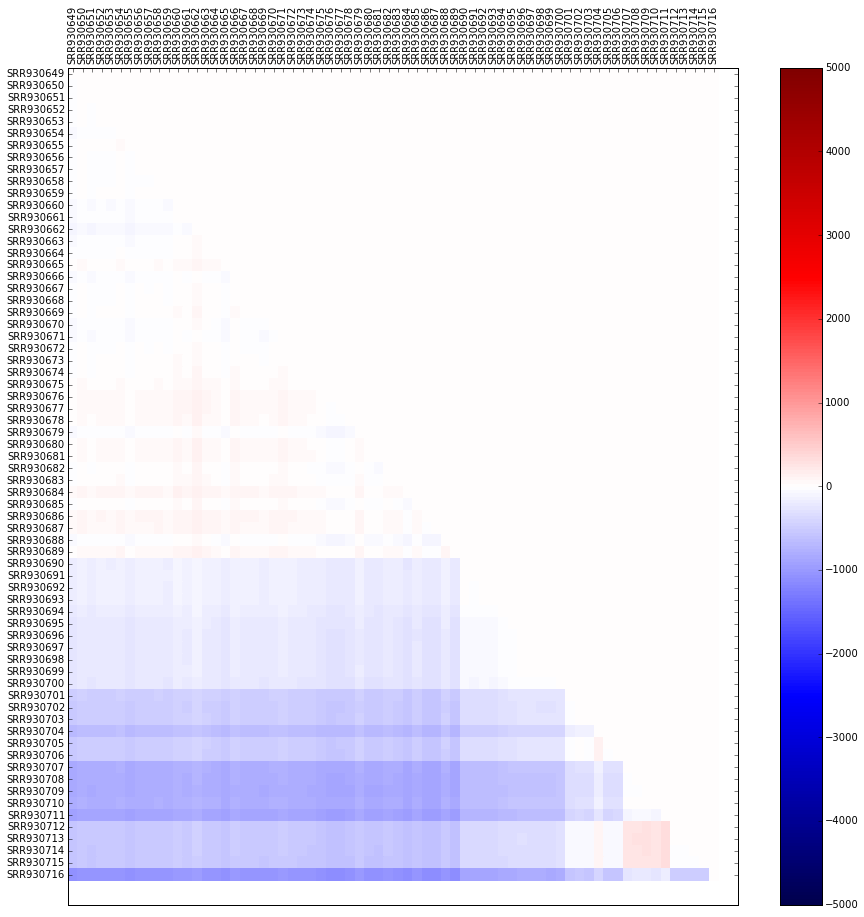

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from pylab import *

#from matplotlib.colors import SymLogNorm

#column_labels = ks_labels
#row_labels = ks_labels

for dataset in [mu_distances]:    
    fig, ax = plt.subplots(figsize=(15, 15))
    heatmap = ax.pcolormesh(dataset, norm=mpl.colors.Normalize(vmin=-500, vmax=500), cmap=plt.cm.seismic)
    print row_labels
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_yticks(np.arange(len(row_labels))+.5)
    ax.set_xticks(np.arange(len(row_labels))+.5)
    ax.set_yticklabels([x[:9] for x in row_labels])
    ax.set_xticklabels([x[:9] for x in row_labels], rotation='vertical')
    plt.colorbar(heatmap)
    plt.show()

In [59]:
row_labels = []
for i in sorted((mu_pi_data.keys())):
    row_labels.append(i)

k = 0       
for i in range(len(row_labels)):
    for j in range(k):
        mu_distances[i][j] = (sum((np.array(all_mu[i][1]) - np.array(all_mu[j][1]))))/max_len[1]
    k += 1

print (mu_pi_data['SRR930653_fullModel-2_K_models_MLE.tsv'][0])

IndexError: index 5 is out of bounds for axis 0 with size 5